# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

In [14]:
### SOLVE HERE

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Load data

In [16]:
folder_path = "Bundle1"

asset_data = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        measurements = []

        with open(file_path, 'r') as file:
            lines = file.readlines()
            asset_name = lines[0].strip()
            num_measurements = int(lines[1])

            for line in lines[2:]:
                time, value = map(lambda x: int(x) if '.' not in x else float(x), line.strip().split())
                measurements.append((time, value))

        asset_data[asset_name] = measurements

### Make predictions

In [17]:
asset_predictions = {}

for asset_name, measurements in asset_data.items():
    times = [point[0] for point in measurements]
    prices = [point[1] for point in measurements]
    X = np.array(times).reshape(-1, 1)
    y = np.array(prices)
    model = LinearRegression()
    model.fit(X, y)

    # Predict stock prices for time 101 to 200
    future_times = np.arange(101, 201).reshape(-1, 1)
    predicted_prices = model.predict(future_times)
    asset_predictions[asset_name] = predicted_prices

### Predictions of expected returns

In [18]:
expected_values = {}

for asset_name, measurements in asset_data.items():
    price_t100 = next((price for time, price in measurements if time == 100), None)
    predicted_price_t200 = asset_predictions[asset_name][-1]

    if price_t100 is not None:
        expected_return = (predicted_price_t200 - price_t100) / price_t100
    else:
        expected_return = None

    expected_values[asset_name] = expected_return

### Calcualte moving standard deviation

In [19]:
asset_std_devs = {}

# Window size for moving standard deviation
window_size = 10  # You can adjust this as needed

for asset_name, measurements in asset_data.items():
    prices = [point[1] for point in measurements]
    std_devs = np.zeros(len(prices) - window_size + 1)

    for i in range(len(prices) - window_size + 1):
        window = prices[i:i + window_size]
        std_devs[i] = np.std(window)

    asset_std_devs[asset_name] = std_devs

### Calculate covariance matrix

In [20]:
# Calculate covariance matrix between asset standard deviations
num_assets = len(asset_std_devs)
covariance_matrix = np.zeros((num_assets, num_assets))

for i, (asset1, std_dev1) in enumerate(asset_std_devs.items()):
    for j, (asset2, std_dev2) in enumerate(asset_std_devs.items()):
        covariance_matrix[i, j] = np.cov(std_dev1, std_dev2)[0, 1]

### Display sample data

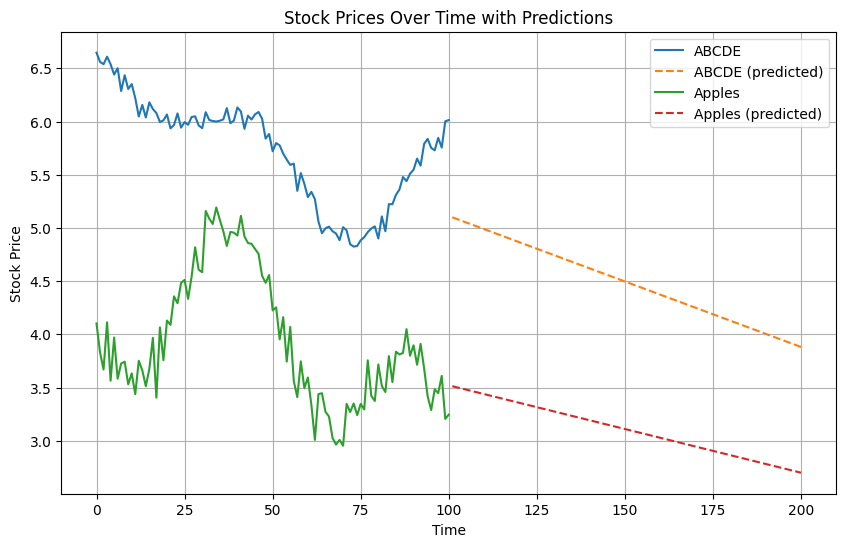

In [21]:
plt.figure(figsize=(10, 6))
NUM_ASSETS = 2

for i, (asset, data) in enumerate(asset_data.items()):
    if i == NUM_ASSETS:
        break
    times = [point[0] for point in data]
    prices = [point[1] for point in data]
    plt.plot(times, prices, label=asset)

    # Plot predictions
    future_times = np.arange(101, 201)
    predicted_prices = asset_predictions[asset]
    plt.plot(future_times, predicted_prices, linestyle='--', label=asset + ' (predicted)')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time with Predictions')
plt.legend()
plt.grid(True)
plt.show()


$$
\[
\text{min} = -k1\sum_{i=1}^{n} w_i r_i + k2\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}
\]
\\ \text{s.t.} \\
\[
\sum_{i=1}^{n} w_i = 1, \quad w_i  \in [0,1]  \quad \text{for } i = 1, ..., n
\]

$$

In [22]:
from cvxopt import matrix, solvers

expected_returns = np.array([expected_values[asset] for asset in asset_data.keys()])
# Construct the matrices and vectors for the optimization problem
c = matrix(-expected_returns)  # Vector of expected returns
Sigma = matrix(covariance_matrix)  # Covariance matrix
n = len(expected_returns)
Q = 2 * Sigma  # Quadratic term in the objective function

# Equality constraint: sum of weights = 1
A = matrix(1.0, (1, n))
b = matrix(1.0)

# Inequality constraints: weights >= 0
G = matrix(-np.eye(n))
h = matrix(0.0, (n, 1))

# Solve the quadratic programming problem
sol = solvers.qp(Q, c, G, h, A, b)

# Extract the optimal weights from the solution
optimal_weights = np.array(sol['x'])

print("Optimal Weights:")
print(optimal_weights)
print("Optimal Portfolio Return:", -sol['primal objective'])


     pcost       dcost       gap    pres   dres
 0: -1.1263e+01 -1.9149e+00  1e+02  2e+01  3e+00
 1: -9.9632e-02 -1.8255e+00  3e+00  9e-02  1e-02
 2: -2.3026e-01 -8.8013e-01  8e-01  3e-02  4e-03
 3: -5.6041e-01 -9.8264e-01  5e-01  9e-03  1e-03
 4: -8.6174e-01 -8.7364e-01  1e-02  1e-04  2e-05
 5: -8.6586e-01 -8.6598e-01  1e-04  1e-06  2e-07
 6: -8.6590e-01 -8.6590e-01  1e-06  1e-08  2e-09
 7: -8.6590e-01 -8.6590e-01  1e-08  1e-10  2e-11
Optimal solution found.
Optimal Weights:
[[1.53458634e-10]
 [1.76118137e-10]
 [1.79021284e-10]
 [1.47928370e-10]
 [4.71639585e-10]
 [3.68286768e-10]
 [9.09438896e-11]
 [1.52947403e-10]
 [2.97611004e-10]
 [9.99999993e-01]
 [1.70063321e-10]
 [1.43488577e-10]
 [2.56869896e-10]
 [2.19727330e-10]
 [2.82509121e-09]
 [1.74292682e-10]
 [2.55530708e-10]
 [1.48442528e-10]
 [1.42040437e-10]
 [1.89992251e-10]]
Optimal Portfolio Return: 0.8659000350497377


In [23]:
def optimize_portfolio(expected_returns, covariance_matrix, k1, k2):
    n = len(expected_returns)

    c = matrix(-k1 * np.array(expected_returns))  # Vector of expected returns
    Sigma = matrix(k2 * np.array(covariance_matrix))  # Covariance matrix
    Q = 2 * Sigma  # Quadratic term in the objective function

    # Equality constraint: sum of weights = 1
    A = matrix(1.0, (1, n))
    b = matrix(1.0)

    # Inequality constraints: weights >= 0
    G = matrix(-np.eye(n))
    h = matrix(0.0, (n, 1))

    sol = solvers.qp(Q, c, G, h, A, b)

    # Extract the optimal weights from the solution
    optimal_weights = np.array(sol['x'])
    portfolio_return = -sol['primal objective']

    return optimal_weights, portfolio_return

def generate_k_values(n=10):
    """
    Generate k1 and k2 values based on a specific pattern.

    Parameters:
        - M (int): Number of objectives.
        - n (int): Number of times a dimension is split.

    Returns:
        - List of tuples: Each tuple contains k1 and k2 values.
    """
    k_values = []
    for j1 in range(n+1):
        k1 = 1 / n * j1
        k2 = 1 - k1
        k_values.append((k1, k2))
    return k_values

def optimize_portfolio_k(expected_returns, covariance_matrix, k_values):
    optimal_weights_list = []
    portfolio_return_list = []

    for k1, k2 in k_values:
        optimal_weights, portfolio_return = optimize_portfolio(expected_returns, covariance_matrix, k1, k2)
        optimal_weights_list.append(optimal_weights)
        portfolio_return_list.append(portfolio_return)

    return optimal_weights_list, portfolio_return_list


In [24]:
optimal_weights_list, portfolio_return_list = optimize_portfolio_k(expected_returns, covariance_matrix, generate_k_values())

# Display the results
for i, (k1, k2) in enumerate(generate_k_values()):
    print(f"k1 = {k1}, k2 = {k2}, Portfolio Return = {portfolio_return_list[i]}")


     pcost       dcost       gap    pres   dres
 0:  1.7435e-04 -1.0011e+00  1e+00  2e-16  5e+00
 1:  1.7363e-04 -1.1077e-02  1e-02  3e-17  5e-02
 2:  1.3005e-04 -9.5854e-04  1e-03  4e-17  5e-03
 3:  3.3744e-05 -2.3401e-04  3e-04  4e-17  1e-18
 4:  2.3140e-05 -3.0092e-05  5e-05  2e-16  5e-19
 5:  1.6677e-05  1.0319e-05  6e-06  2e-16  5e-19
 6:  1.5609e-05  1.5088e-05  5e-07  5e-17  4e-19
 7:  1.5432e-05  1.5386e-05  5e-08  1e-16  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.8809e-02 -1.0874e+00  3e+01  5e+00  5e+00
 1:  1.8123e-02 -1.0023e+00  1e+00  9e-16  2e-15
 2:  1.1381e-02 -9.6151e-02  1e-01  2e-16  1e-15
 3: -6.7608e-02 -1.5366e-01  9e-02  3e-16  5e-16
 4: -7.9754e-02 -8.2861e-02  3e-03  3e-18  2e-16
 5: -8.1973e-02 -8.2054e-02  8e-05  2e-16  3e-16
 6: -8.2022e-02 -8.2027e-02  5e-06  2e-16  2e-16
 7: -8.2023e-02 -8.2024e-02  3e-07  2e-16  1e-16
 8: -8.2023e-02 -8.2023e-02  3e-09  2e-16  2e-16
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0:  1.7435e-04 -1.0011e+00  1e+00  2e-16  5e+00
 1:  1.7363e-04 -1.1077e-02  1e-02  3e-17  5e-02
 2:  1.3005e-04 -9.5854e-04  1e-03  4e-17  5e-03
 3:  3.3744e-05 -2.3401e-04  3e-04  4e-17  1e-18
 4:  2.3140e-05 -3.0092e-05  5e-05  2e-16  5e-19
 5:  1.6677e-05  1.0319e-05  6e-06  2e-16  5e-19
 6:  1.5609e-05  1.5088e-05  5e-07  5e-17  4e-19
 7:  1.5432e-05  1.5386e-05  5e-08  1e-16  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.8809e-02 -1.0874e+00  3e+01  5e+00  5e+00
 1:  1.8123e-02 -1.0023e+00  1e+00  9e-16  2e-15
 2:  1.1381e-02 -9.6151e-02  1e-01  2e-16  1e-15
 3: -6.7608e-02 -1.5366e-01  9e-02  3e-16  5e-16
 4: -7.9754e-02 -8.2861e-02  3e-03  3e-18  2e-16
 5: -8.1973e-02 -8.2054e-02  8e-05  2e-16  3e-16
 6: -8.2022e-02 -8.2027e-02  5e-06  2e-16  2e-16
 7: -8.2023e-02 -8.2024e-02  3e-07  2e-16  1e-16
 8: -8.2023e-02 -8.2023e-02  3e-09  2e-16  2e-16
Optimal solution found.
     pcost       dcost 

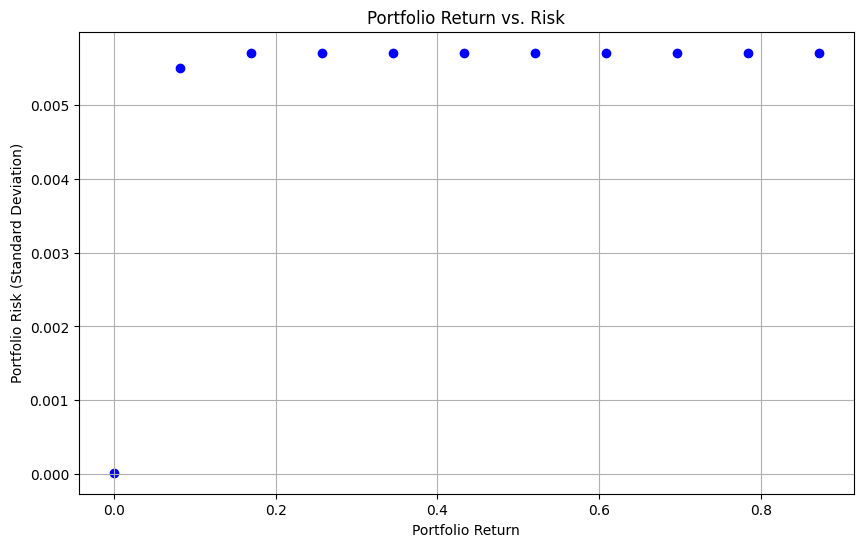

In [25]:
def calculate_risk(weights, covariance_matrix):
    """
    Calculate the risk of a portfolio.

    Parameters:
        - weights (array): Portfolio weights.
        - covariance_matrix (array): Covariance matrix.

    Returns:
        - float: Portfolio risk.
    """
    s= 0
    for i, w1 in enumerate(weights):
        for j, w2 in enumerate(weights):
            s += w1*w2*covariance_matrix[i,j]
    risk = np.dot(weights.T, np.dot(covariance_matrix, weights))
    return s
    # return np.sqrt(risk)

def plot_portfolio_risk_return(expected_returns, covariance_matrix, k_values):

    optimal_weights_list, portfolio_return_list = optimize_portfolio_k(expected_returns, covariance_matrix, k_values)

    risks = []
    for weights in optimal_weights_list:
        risk = calculate_risk(weights, covariance_matrix)
        risks.append(risk)

    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_return_list, risks, marker='o', color='b')

    # for i, (k1, k2) in enumerate(k_values):
    #     plt.text(portfolio_return_list[i], risks[i], f"k1={k1:.2f}, k2={k2:.2f}")

    plt.xlabel('Portfolio Return')
    plt.ylabel('Portfolio Risk (Standard Deviation)')
    plt.title('Portfolio Return vs. Risk')
    plt.grid(True)
    plt.show()

# Example usage
# Define expected_returns and covariance_matrix here...

# Generate k values
k_values = generate_k_values(n=10)

# Plot portfolio risk vs. return
plot_portfolio_risk_return(expected_returns, covariance_matrix, k_values)
